In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("aapl_us_d.csv")
data.head(5)

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


In [4]:
data["Date"]=pd.to_datetime(data["Date"])

In [5]:
data.head(5)

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10080 non-null  datetime64[ns]
 1   Open    10080 non-null  float64       
 2   High    10080 non-null  float64       
 3   Low     10080 non-null  float64       
 4   Close   10080 non-null  float64       
 5   Volume  10080 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 472.6 KB


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [9]:
data.corr()

,Date,Open,High,Low,Close,Volume
Date,1.000000,0.689801,0.689790,0.689767,0.689780,-0.022282
Open,0.689801,1.000000,0.999942,0.999941,0.999873,-0.306156
High,0.689790,0.999942,1.000000,0.999923,0.999941,-0.305832
Low,0.689767,0.999941,0.999923,1.000000,0.999940,-0.306658
Close,0.689780,0.999873,0.999941,0.999940,1.000000,-0.306259
Volume,-0.022282,-0.306156,-0.305832,-0.306658,-0.306259,1.000000


In [10]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,10080,10080.000000,10080.000000,10080.000000,10080.000000,1.008000e+04
mean,2004-08-29 14:16:00,24.212653,24.474183,23.962728,24.228588,3.901825e+08
min,1984-09-07 00:00:00,0.055411,0.056019,0.054803,0.054803,2.811754e+06
25%,1994-08-24 18:00:00,0.292936,0.298629,0.286002,0.292288,1.385973e+08
50%,2004-08-28 12:00:00,0.884054,0.907432,0.864364,0.883006,2.576699e+08
75%,2014-09-02 06:00:00,21.635500,21.869775,21.426925,21.649000,4.927167e+08
max,2024-09-06 00:00:00,236.480000,237.230000,233.090000,234.820000,8.706575e+09
std,NaN,48.475894,48.997820,47.988301,48.513977,4.026818e+08


Text(0.5, 1.0, 'Price of Apple Stock over Time')

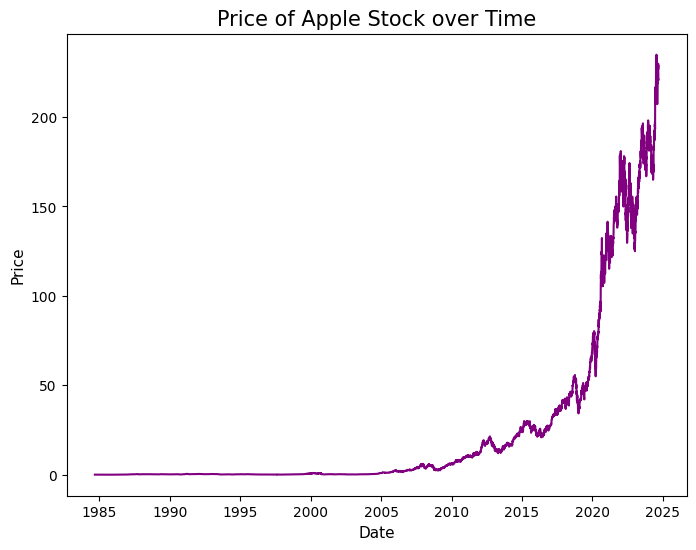

In [11]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Date",y="Close",data=data,color="purple")
plt.xlabel("Date",fontsize=11)
plt.ylabel("Price",fontsize=11)
plt.title("Price of Apple Stock over Time",fontsize=15)

In [16]:
data['Date'] = data['Date'].astype(np.int64)

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=10, random_state=42)

In [18]:
x=data.drop(["Close"],axis=1)
y=data["Close"]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [21]:
y_pred=rfr.predict(x_test)

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
print("R2 Score :",r2*100)
print("Mean Squared Error :",mse)

R2 Score : 99.98873126662495
Mean Squared Error : 0.2573048590175187
